In [1]:
import pandas as pd
import geopandas as gpd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import os

Now that we have all the weather files downloaded, let's concat them into one big dataframe:

In [2]:

#list all the files from the directory
file_list = os.listdir('Data/Weather_Daily')


Below I'll be looking through my `Data/Weather_Daily` folder and grabbing the file names of all the csv to add them into a list. This is so that I can later start concatinating the csvs together.


In [35]:
all_df = []
k=0
for file in file_list:
    try:
        df = pd.read_csv(f'Data/Weather_Daily/{file}',encoding='unicode_escape')
    except Exception as e:
        k+=1
        print(f'oop {k}')
        print(f'{file}:{e}')
        pass


    all_df.append(df)


oop 1
climate_daily_BC_1165793_2007-06_P1D.csv:No columns to parse from file


In [36]:
Concat_table = pd.concat(all_df)

/var/folders/g4/w2hwfpc1681072qk9l2n84600000gn/T/ipykernel_73623/619429562.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Concat_table = pd.concat(all_df)


In [39]:
Concat_table.head(10)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-01,1993,11,1,NaN,6.0,...,0.0,T,0.0,T,0.0,NaN,NaN,NaN,NaN,NaN
1,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-02,1993,11,2,NaN,3.5,...,9.0,NaN,9.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-03,1993,11,3,NaN,-1.0,...,7.0,NaN,7.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN
3,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-04,1993,11,4,NaN,-5.0,...,0.0,T,0.0,T,15.0,NaN,NaN,NaN,NaN,NaN
4,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-05,1993,11,5,NaN,-7.0,...,0.0,NaN,0.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN
5,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-06,1993,11,6,NaN,-0.5,...,0.0,NaN,0.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN
6,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-07,1993,11,7,NaN,-6.5,...,1.0,NaN,1.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN
7,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-08,1993,11,8,NaN,-5.0,...,0.0,NaN,0.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN
8,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-09,1993,11,9,NaN,-0.5,...,0.0,NaN,0.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN
9,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-10,1993,11,10,NaN,-2.0,...,0.0,NaN,0.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN


We can see below that right now, we have 4,634,084 rows and 31 columns. 

In [40]:
Concat_table.shape

(4634084, 31)

Let's look at the column names and see what we have:

In [41]:
Concat_table.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

Now let's look at how much of what we have in that table is null values, and duplicated: 

In [42]:
Concat_table.isna().sum()

Longitude (x)                      0
Latitude (y)                       0
Station Name                       0
Climate ID                         0
Date/Time                          0
Year                               0
Month                              0
Day                                0
Data Quality                 3661829
Max Temp (°C)                 510760
Max Temp Flag                4447417
Min Temp (°C)                 508635
Min Temp Flag                4443236
Mean Temp (°C)                702281
Mean Temp Flag               4353287
Heat Deg Days (°C)            702281
Heat Deg Days Flag           4353287
Cool Deg Days (°C)            702281
Cool Deg Days Flag           4353287
Total Rain (mm)               836266
Total Rain Flag              3992339
Total Snow (cm)               811268
Total Snow Flag              4004703
Total Precip (mm)             425957
Total Precip Flag            4118988
Snow on Grnd (cm)             993549
Snow on Grnd Flag            4345482
D

In [43]:
Concat_table.duplicated().sum()

28

In [44]:
Concat_table['Date']=pd.to_datetime(Concat_table[['Year','Month','Day']])

In [45]:
Concat_table.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag,Date
0,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-01,1993,11,1,NaN,6.0,...,T,0.0,T,0.0,NaN,NaN,NaN,NaN,NaN,1993-11-01
1,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-02,1993,11,2,NaN,3.5,...,NaN,9.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1993-11-02
2,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-03,1993,11,3,NaN,-1.0,...,NaN,7.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,1993-11-03
3,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-04,1993,11,4,NaN,-5.0,...,T,0.0,T,15.0,NaN,NaN,NaN,NaN,NaN,1993-11-04
4,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-05,1993,11,5,NaN,-7.0,...,NaN,0.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,1993-11-05


Let's now set the Date as the index, this will help us with merging the with the final modelling table later on. 

In [46]:
Concat_table.set_index('Date',inplace=True)

In [47]:
Concat_table.dtypes

Longitude (x)                float64
Latitude (y)                 float64
Station Name                  object
Climate ID                    object
Date/Time                     object
Year                          object
Month                         object
Day                           object
Data Quality                  object
Max Temp (°C)                float64
Max Temp Flag                 object
Min Temp (°C)                float64
Min Temp Flag                 object
Mean Temp (°C)               float64
Mean Temp Flag                object
Heat Deg Days (°C)           float64
Heat Deg Days Flag            object
Cool Deg Days (°C)           float64
Cool Deg Days Flag            object
Total Rain (mm)              float64
Total Rain Flag               object
Total Snow (cm)              float64
Total Snow Flag               object
Total Precip (mm)            float64
Total Precip Flag             object
Snow on Grnd (cm)            float64
Snow on Grnd Flag             object
D

Data types look good!

Now, let's merge our daily weather data into monthly data, getting the monthly average of all the weather measurements collected. We're doing this to be able to predict wheather a fire is likely to occur by month, rather than within a day. This allows for our model to be a little more accurate since the outcome is generalized into a month. 

In [49]:
monthly_df = Concat_table.groupby(['Climate ID','Longitude (x)','Latitude (y)','Year','Month'])[['Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)','Heat Deg Days (°C)',
       'Cool Deg Days (°C)', 'Total Rain (mm)','Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)']].resample('ME').mean().reset_index()

In [53]:
monthly_df.sort_index(ascending=False,inplace=True)


*We've come back here after modelling to make adjustments to the tables. We know that the features below are what we're going to end up with when predicting weather. Since we want to add additional features that take into account up to 3 prior months, we'll add the new features while we concat the tables together. We're doing this now because we want to make sure that when we get the shift of weather data, the information stays within the station we're gathering that data from. If we were to do it after concating, the weather data will shift through all stations and will cause our model to train on bad data. 

In [54]:
# Added after modeling- these are the features we will end up using
for i in range(1,4):
    monthly_df[f'MT {i} month prior'] = monthly_df.groupby(['Climate ID', 'Longitude (x)', 'Latitude (y)'])['Mean Temp (°C)'].shift(i)
    monthly_df[f'TS {i} month prior'] = monthly_df.groupby(['Climate ID', 'Longitude (x)', 'Latitude (y)'])['Total Snow (cm)'].shift(i)
    monthly_df[f'TP {i} month prior'] = monthly_df.groupby(['Climate ID', 'Longitude (x)', 'Latitude (y)'])['Total Precip (mm)'].shift(i)

In [56]:
monthly_df.head(10)

,Climate ID,Longitude (x),Latitude (y),Year,Month,Date,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),...,Snow on Grnd (cm),MT 1 month prior,TS 1 month prior,TP 1 month prior,MT 2 month prior,TS 2 month prior,TP 2 month prior,MT 3 month prior,TS 3 month prior,TP 3 month prior
153774,709CEE9,-78.28,48.8,2022,12,2022-12-31,-4.435484,-13.155172,NaN,NaN,...,21.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153773,709CEE9,-78.28,48.8,2022,11,2022-11-30,4.475000,-3.736842,NaN,NaN,...,2.166667,NaN,1.166667,1.400000,NaN,NaN,NaN,NaN,NaN,NaN
153772,709CEE9,-78.28,48.8,2022,10,2022-10-31,11.400000,1.875000,NaN,NaN,...,0.000000,NaN,0.613636,2.394444,NaN,1.166667,1.400000,NaN,NaN,NaN
153771,709CEE9,-78.28,48.8,2022,9,2022-09-30,16.500000,5.312500,NaN,NaN,...,0.000000,NaN,0.000000,2.821053,NaN,0.613636,2.394444,NaN,1.166667,1.400000
153770,709CEE9,-78.28,48.8,2022,8,2022-08-31,22.962963,10.222222,NaN,NaN,...,0.000000,NaN,0.000000,2.534783,NaN,0.000000,2.821053,NaN,0.613636,2.394444
153769,709CEE9,-78.28,48.8,2022,7,2022-07-31,23.287097,10.164516,NaN,NaN,...,0.000000,NaN,0.000000,1.984000,NaN,0.000000,2.534783,NaN,0.000000,2.821053
153768,709CEE9,-78.28,48.8,2022,6,2022-06-30,21.600000,8.253333,NaN,NaN,...,0.000000,NaN,0.000000,4.158621,NaN,0.000000,1.984000,NaN,0.000000,2.534783
153767,709CEE9,-78.28,48.8,2022,5,2022-05-31,18.777419,4.077419,NaN,NaN,...,0.000000,NaN,0.000000,4.948148,NaN,0.000000,4.158621,NaN,0.000000,1.984000
153766,709CEE9,-78.28,48.8,2022,4,2022-04-30,5.953333,-4.680000,NaN,NaN,...,60.166667,NaN,0.000000,2.508333,NaN,0.000000,4.948148,NaN,0.000000,4.158621
153765,709CEE9,-78.28,48.8,2022,3,2022-03-31,-1.812903,-14.396774,NaN,NaN,...,86.461538,NaN,0.411765,0.583333,NaN,0.000000,2.508333,NaN,0.000000,4.948148


In [57]:
monthly_df.duplicated().sum()

0

We can see below that the total rows are now 160,667!

In [58]:
monthly_df.shape

(153775, 24)

Let's take a look at our missing data:

In [59]:
for i in range(len(monthly_df.columns)):
    na_index=monthly_df.isna().sum().index[i]
    na_ratio=monthly_df.isna().sum().iloc[i]
    print(f'{na_index} has {round((na_ratio/160667)*100,2)}% missing data')


Climate ID has 0.0% missing data
Longitude (x) has 0.0% missing data
Latitude (y) has 0.0% missing data
Year has 0.0% missing data
Month has 0.0% missing data
Date has 0.0% missing data
Max Temp (°C) has 6.87% missing data
Min Temp (°C) has 6.85% missing data
Mean Temp (°C) has 9.95% missing data
Heat Deg Days (°C) has 9.95% missing data
Cool Deg Days (°C) has 9.95% missing data
Total Rain (mm) has 13.59% missing data
Total Snow (cm) has 14.17% missing data
Total Precip (mm) has 4.75% missing data
Snow on Grnd (cm) has 14.37% missing data
MT 1 month prior has 10.19% missing data
TS 1 month prior has 14.41% missing data
TP 1 month prior has 5.0% missing data
MT 2 month prior has 10.44% missing data
TS 2 month prior has 14.65% missing data
TP 2 month prior has 5.26% missing data
MT 3 month prior has 10.69% missing data
TS 3 month prior has 14.9% missing data
TP 3 month prior has 5.51% missing data


We can see that the most data missing is `Snow on Grnd (cm)` which is still under 25% of our dataset. We can certainly work with the missing data we have, either by extrapulating or dropping those points all together. We'll make that decision in our modelling section

Let's now take a look at the colinearity of our columns:

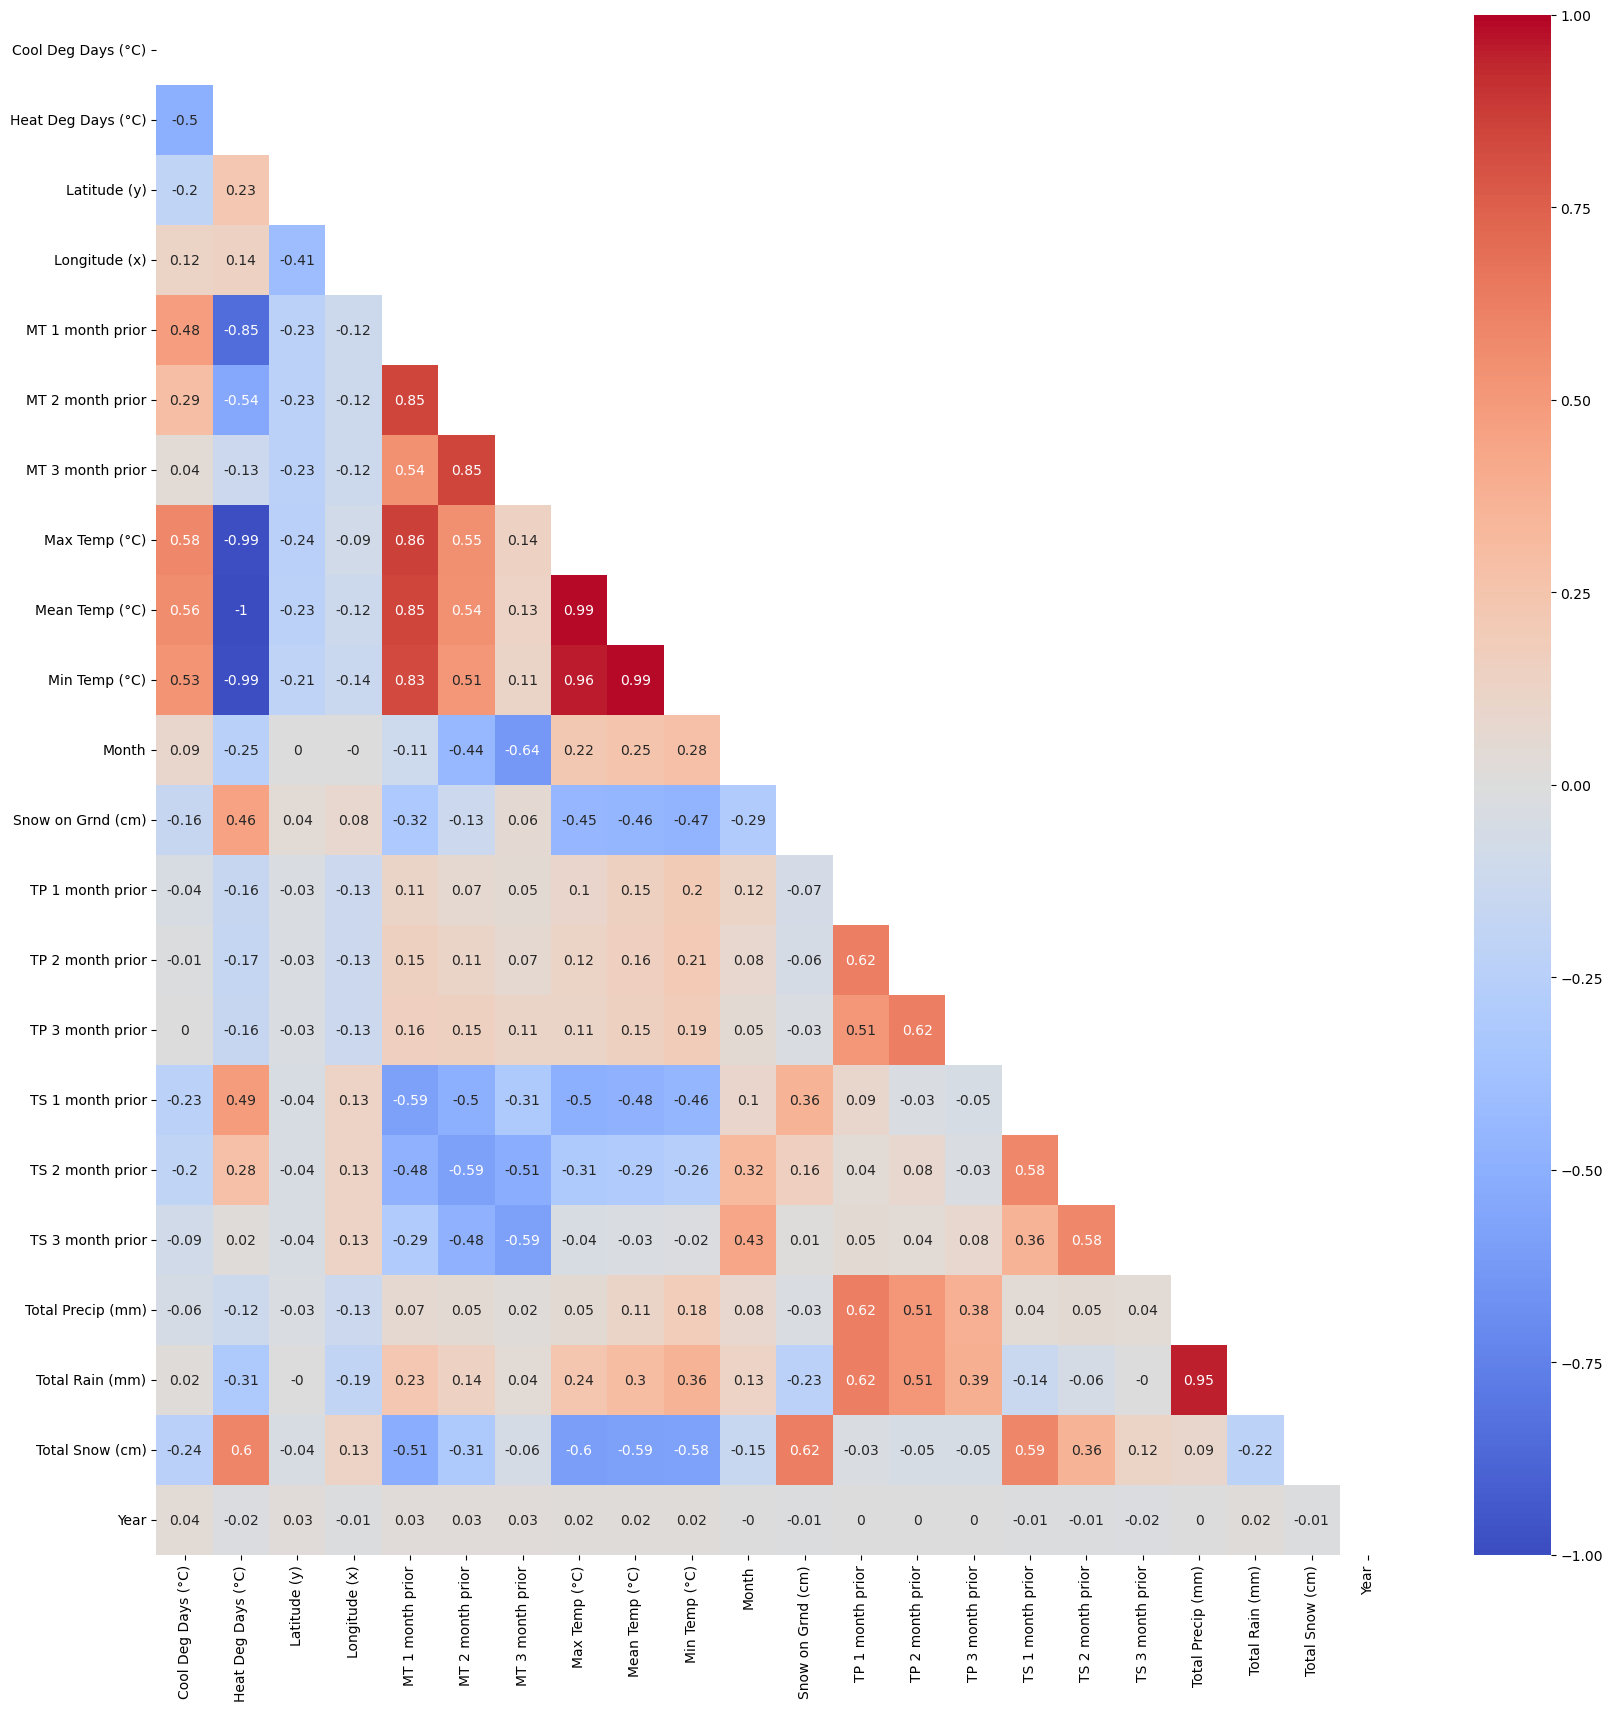

In [60]:
X=monthly_df.loc[:, monthly_df.columns.difference(['Date','Climate ID'])]
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()


We can see some high colinearities above. Based on the chart, we can drop the following: 

- `Max Temp (°C)`- We already have the mean temp calculated, so we won't need the Max or min temps
- `Min Temp (°C)`- We already have the mean temp calculated, so we won't need the Max or min temps
- `Total Rain (mm)` - Total Rain and total precip are highly correlated, let's only look at precipitation since there is less missing data there. 

Let's drop these 3 for now and see how the correlations change. 


In [61]:
monthly_df.drop(columns=['Max Temp (°C)','Min Temp (°C)','Total Rain (mm)'],inplace=True,axis=1)

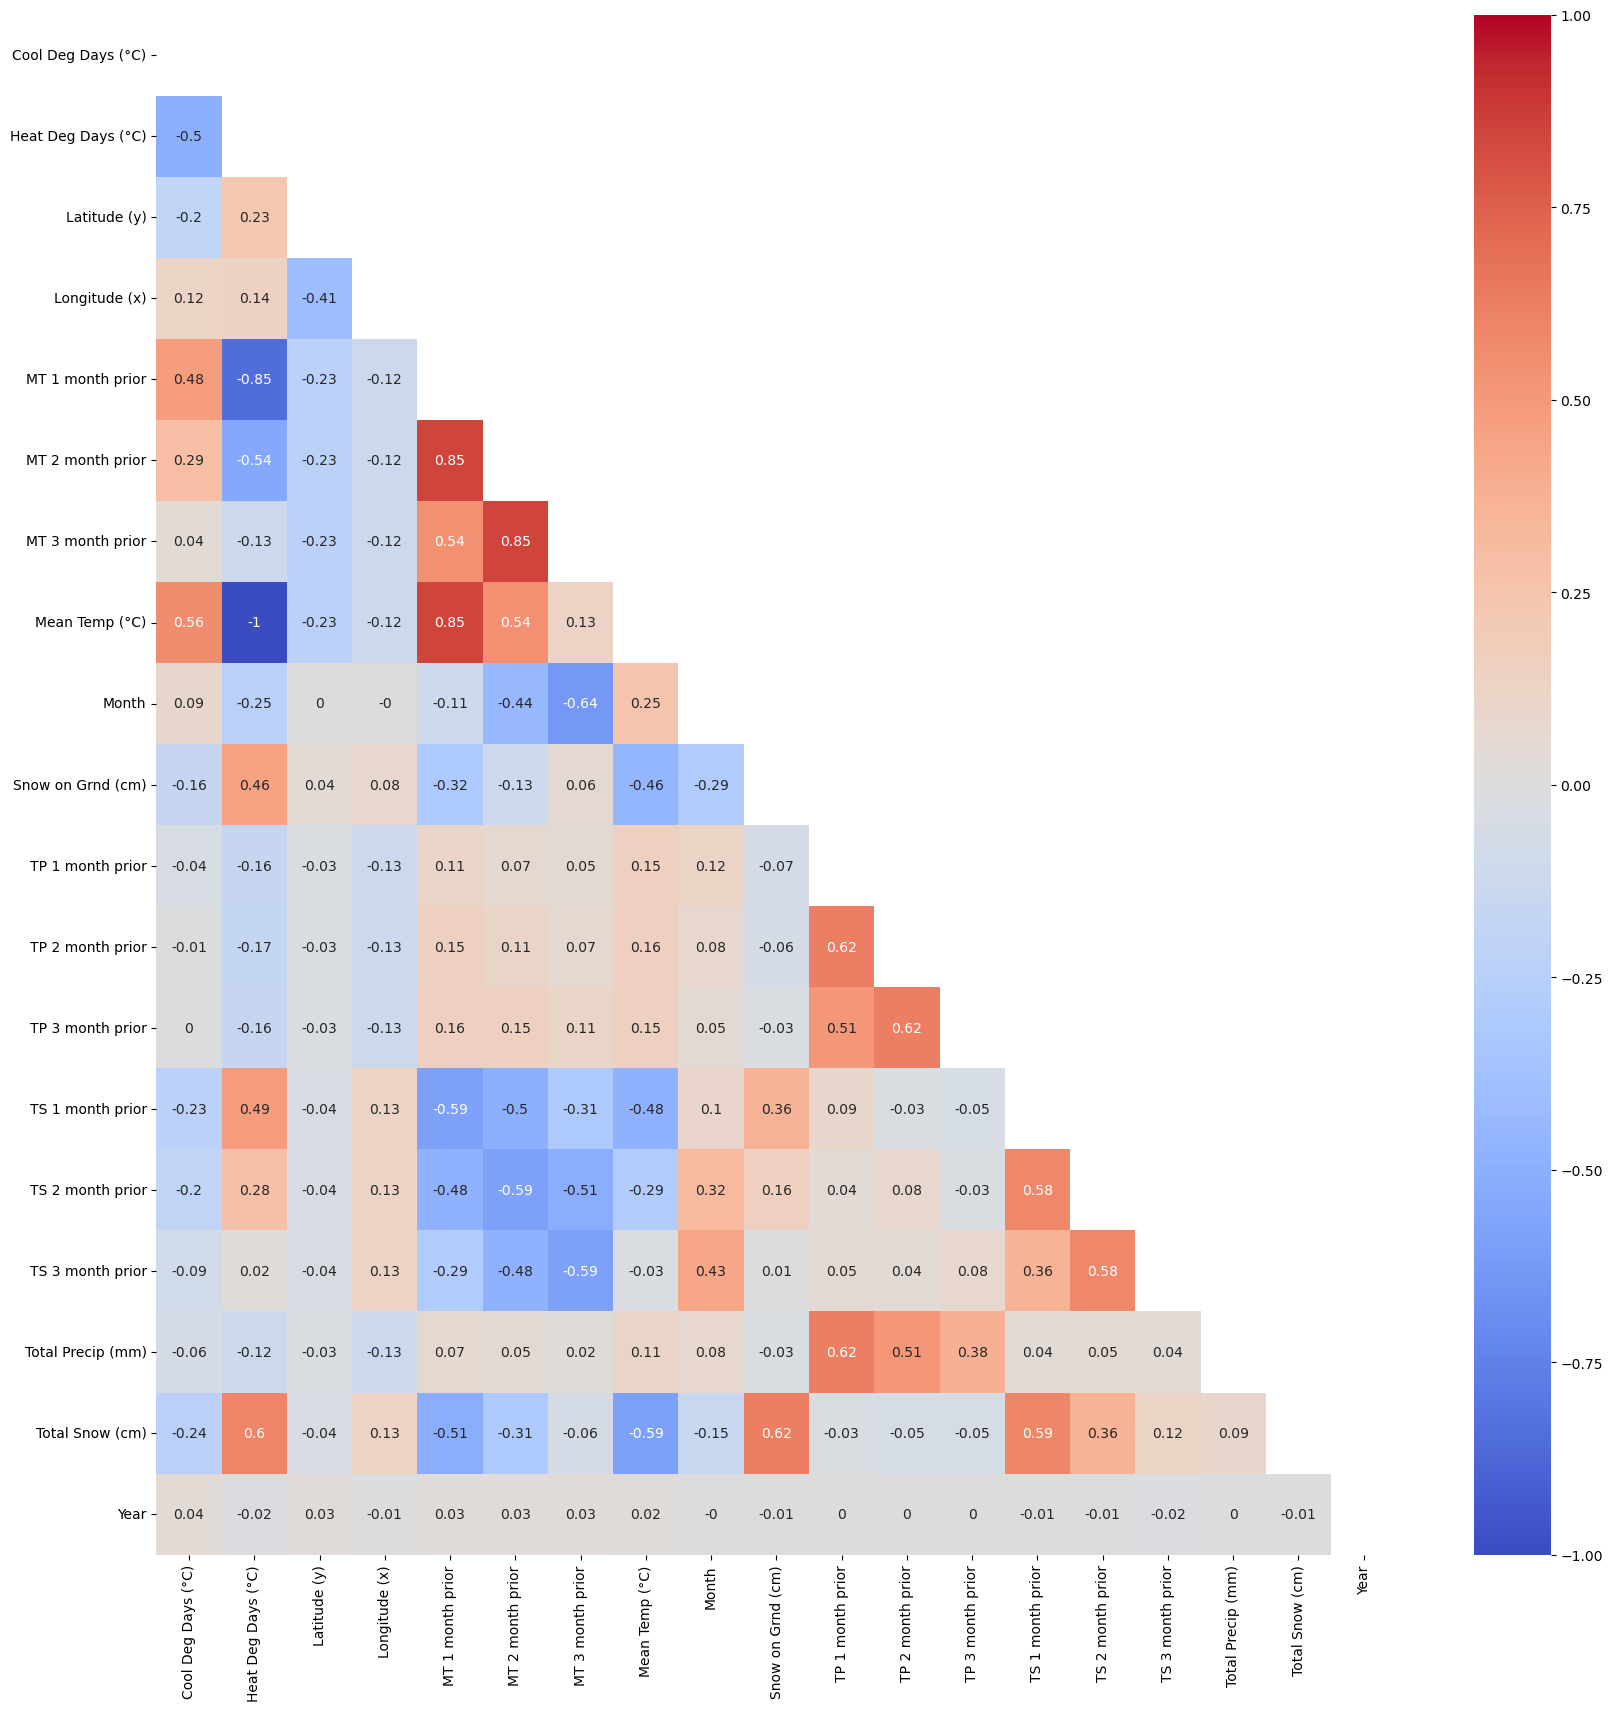

In [62]:
X=monthly_df.loc[:, monthly_df.columns.difference(['Date','Climate ID'])]

# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()


Climate ID has 0.0% missing data
Date has 0.0% missing data
Max Temp (°C) has 11.16% missing data
Min Temp (°C) has 11.14% missing data
Mean Temp (°C) has 14.24% missing data
 has 14.24% missing data
Cool Deg Days (°C) has 14.24% missing data
Total Rain (mm) has 17.88% missing data
Total Snow (cm) has 18.46% missing data
Total Precip (mm) has 9.04% missing data
Snow on Grnd (cm) has 18.66% missing data


Let's now drop the following columns:

- `Heat Deg Days (°C)` - high correlation with `Total Snow (cm)` and `Mean Temp (°C)`
- `Snow on Grnd (cm)` -  we already have a `Total Snow (cm)` column that gives us the same information
- `Cool Deg Days (°C)` - We already have temperature measured within `Mean Temp (°C)`

In [63]:
monthly_df.drop(columns=['Heat Deg Days (°C)','Snow on Grnd (cm)','Cool Deg Days (°C)'],inplace=True,axis=1)


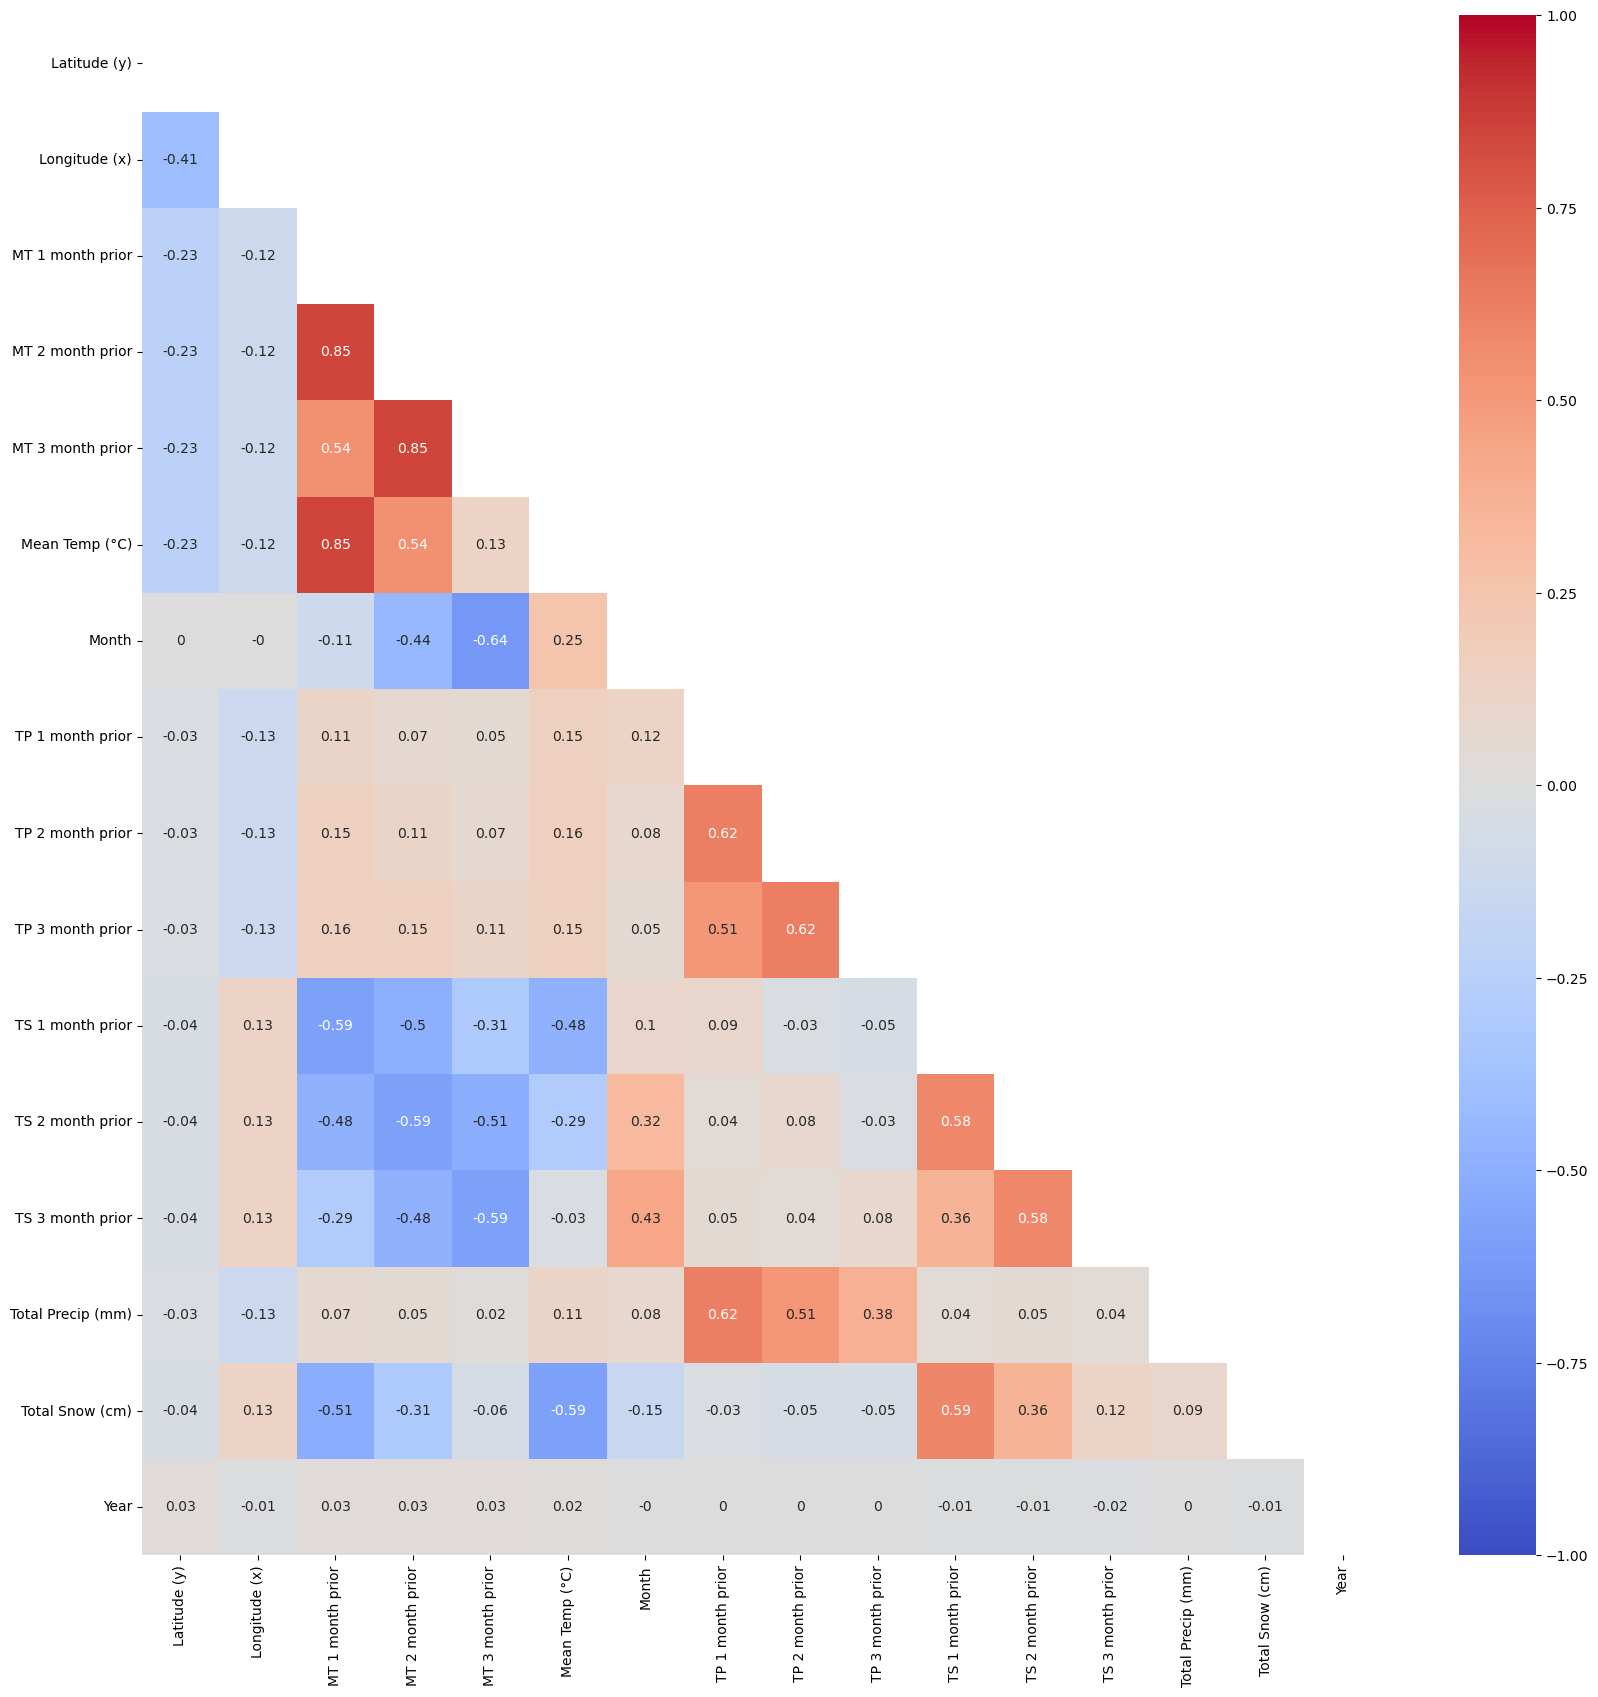

In [64]:
X=monthly_df.loc[:, monthly_df.columns.difference(['Date','Climate ID'])]

# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()


Even though there is a correlation of under -0.5 between `Mean Temp (°C)` and `Total Snow (cm)`, I do want to keep them both as we want to look at how less/more snow within the year impacts whether there will be a fire or not. 
Despite there being a high correlation with the trailing feature columns, we'll still leave them in as they are crucial in getting our model to work!

In [65]:
monthly_df.to_csv('Data/Monthly_Weather_Data/monthly_weather.csv')